# Gaussian Plume Model for Air Dispersion

In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt

In [2]:
if not os.path.exists("images"):
    os.mkdir("images")

In [3]:
var_names = {
    "C": "Mean concentration (g/m^3)",
    "y": "Crosswind distance (m)",
    "z": "Vertical distance (m)",
    "Q": "Pollutant emission rate (g/s)",
    "sigma_y": "Lateral disperion coefficient (m)", 
    "sigma_z": "Vertical disperion coefficient (m)",
    "U": "Mean wind velocity in downwind direction (m/s)",
    "H": "Effective stack height (m)"
}

In [4]:
params = {
    "Q": 80,
    "sigma_y": 290, 
    "sigma_z": 220,
    "U": 5.6,
    "H": 100
}

In [5]:
def calc_concentration_GPM(y, z, params):
    Q = params["Q"]
    sigma_y = params["sigma_y"]
    sigma_z = params["sigma_z"]
    U = params["U"]
    H = params["H"] 
    return Q / (2 * np.pi * U * sigma_y * sigma_z) \
        * np.exp(-y**2 / (2 * sigma_y**2)) * (
            np.exp(-(z - H)**2 / (2 * sigma_z**2)) 
            + np.exp(-(z + H)**2 / (2 * sigma_z**2))
        )

In [6]:
x = 2000
y = 0
z = 10
calc_concentration_GPM(y, z, params)

6.42259171565271e-05

In [7]:
y_values = np.linspace(-100, 100, 51)
z_values = np.linspace(0, 200, 51)
y_grid, z_grid = np.meshgrid(y_values, z_values)

conc = calc_concentration_GPM(y_grid, z_grid, params)
assert(conc.shape == (y_values.shape[0], z_values.shape[0]))

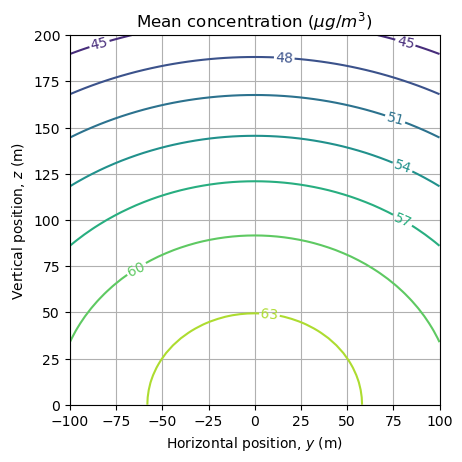

In [8]:
fig, ax = plt.subplots()
p = ax.contour(y_grid, z_grid, conc * 1e6)
ax.clabel(p)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("Horizontal position, $y$ (m)")
ax.set_ylabel("Vertical position, $z$ (m)")
ax.grid()
ax.set_title("Mean concentration (${\mu}g/m^3$)")
plt.savefig("images/conc_contplot.png", dpi=150)
plt.show()